# Welcome to PyHEP 2020!

<br><br><br>

Before writing this tutorial, I took a look at the survey...

In [ ]:
import pandas
df = pandas.read_csv("survey-results.csv")
df

In [ ]:
df["Professional life: What best describes your occupation?"].value_counts(ascending=True).plot.barh();

In [ ]:
df["Professional life: What best describes the stage of your professional career?"].value_counts(ascending=True).plot.barh();

In [ ]:
languages = [
    "C or C++",
    "Python",
    "Matlab",
    "Javascript or other browser-based (e.g. TypeScript, CoffeeScript)",
    "Verilog, VHDL, or other hardware description language",
    "R",
    "Java or other JVM-based (e.g. Kotlin, Scala, Clojure)",
    "Perl",
    "PHP",
    "C#",
    "Julia",
    "Go",
    "Swift",
    "Rust",
    "Ruby",
    "Haskell",
    "Raw assembly or machine code",
    "Other, not listed above",
]
def explode(responses):
    responses = [response.strip() for response in responses.split(";")]
    return [1.0 if language in responses else 0.0 for language in languages]
exploded = df[["Computing and programming: Which of the following languages do you use regularly (i.e. more than 10% of your work)?"]].fillna("").applymap(explode)
indicator = pandas.DataFrame(exploded.iloc[:, 0].tolist(), columns=languages)
indicator.div(indicator.sum(axis=1), axis=0).sum(axis=0).iloc[::-1].plot.barh(figsize=(5, 7));

In [ ]:
df[[
    "Computing and programming: Do you *expect* to use Python more or less in the future (as a fraction of your programming time)?",
    "Computing and programming: Do you *want* to use Python more or less in the future (as a fraction of your programming time)?"
]].apply(pandas.Series.value_counts).loc[["Less", "About the same", "More", "Don't know"]].plot.bar(rot=0).legend(bbox_to_anchor=(1.2, 0.5));

In [ ]:
cols = {x: x.split(":")[1].strip() for x in df.columns if x.startswith("Python ecosystem:") and "?" not in x}
order = ((df[list(cols)] == "Don't know what it is") | (df[list(cols)] == "Never")).sum(axis=0).sort_values(ascending=False).index.tolist()
pkgs = df[order].rename(columns=cols).apply(pandas.Series.value_counts).T[[
    "Don't know what it is", "Never", "Through dependencies only", "Regularly", "All the time"
]].fillna(0)
pkgs.insert(0, "No selection", pkgs.sum(axis=1).max() - pkgs.sum(axis=1))
pkgs.plot.barh(stacked=True, width=0.9, figsize=(20, 20), color=["#5e79e0", "#798bd1", "#992cc7", "#f5f518", "#ffa640", "#ff5a30"]).legend(bbox_to_anchor=(1.2, 0.5));

In [ ]:
cols = {x: x.split(":")[1].strip() for x in df.columns if x.startswith("Particle physics ecosystem:") and "?" not in x}
order = ((df[list(cols)] == "Don't know what it is") | (df[list(cols)] == "Never")).sum(axis=0).sort_values(ascending=False).index.tolist()
pkgs = df[order].rename(columns=cols).apply(pandas.Series.value_counts).T[[
    "Don't know what it is", "Never", "Through dependencies only", "Regularly", "All the time"
]].fillna(0)
pkgs.insert(0, "No selection", pkgs.sum(axis=1).max() - pkgs.sum(axis=1))
pkgs.plot.barh(stacked=True, width=0.9, figsize=(20, 20), color=["#5e79e0", "#798bd1", "#992cc7", "#f5f518", "#ffa640", "#ff5a30"]).legend(bbox_to_anchor=(1.2, 0.5));

In [ ]:
hopes = [
    "Particle physics analysis tools (other than ROOT)",
    "General-purpose data analysis toolkits",
    "Machine learning/deep learning toolkits",
    "Software engineering skills (beyond the fundamentals)",
    "ROOT and PyROOT",
    "Python fundamentals (how to program in Python)",
    "Collaboration-specific topics",
    "Other",
]
def explode(responses):
    responses = [response.strip() for response in responses.split(";")]
    return [1.0 if hope in responses else 0.0 for hope in hopes]
exploded = df[["PyHEP feedback: What are you hoping to learn from this workshop?"]].fillna("").applymap(explode)
indicator = pandas.DataFrame(exploded.iloc[:, 0].tolist(), columns=hopes)
indicator.div(indicator.sum(axis=1), axis=0).sum(axis=0).iloc[::-1].plot.barh(figsize=(5, 7));

<br><br><br><br><br>

## Conclusions:

   1. You are mostly grad students and postdocs engaged in physics research.
   2. You use Python and C++ about equally, but want to use Python more.
   3. You are familiar with the major libraries of the Python world: NumPy, Matplotlib, machine learning.
   4. You are less familiar with Python libraries intended for physics analysis.
   5. But you want to learn.

So let's get started!

<br><br><br><br><br>

<img src="img/uproot-logo-300px.png" alt="Uproot" width="300px" style="margin-bottom: -50px; margin-right: 20px"><font size="5"> is a pure-Python implementation of ROOT I/O.</font>

<br><br>

<img src="img/abstraction-layers.png" width="900px">

<img src="img/awkward-logo-600px.png" alt="Uproot" width="350px" style="margin-bottom: -29px; margin-right: 20px"><font size="5"> is a generalization of NumPy to data structures (such as jagged arrays).</font>

<br><br>

<img src="img/cartoon-schematic.png" width="1000px">

<br><br><br>

# Interesting times!

<font size="4">We happen to be in the middle of a transition from <b>Uproot 3.x → Uproot 4.x</b> and <b>Awkward 0.x → Awkward 1.x</b>.</font>

<img src="img/uproot-awkward-timeline.png" width="900px">

<font size="4">You can use both! Old and new versions are independently installable/importable.</font>

<table style="font-size: 1.5em; font-weight: bold; margin-left: 0px">
    <tr style="background: white"><td></td><td style="color: gray">Now</td><td style="color: gray">Later this year</td></tr>
    <tr style="background: white"><td style="color: gray">Old versions</td><td style="color: blue">uproot, awkward</td><td>uproot3, awkward0</td></tr>
    <tr style="background: white"><td style="color: gray">New versions</td><td>uproot4, awkward1</td><td style="color: blue">uproot, awkward</td></tr>
</table>

<img src="img/Raiders-of-the-Lost-Ark-Chamber.jpg" width="800px">

<br><br><br><br><br>

# What will this tutorial use?

New versions of both: **Uproot 4** and **Awkward 1**. This tutorial is bleeding edge.

In [1]:
import uproot4
import awkward1 as ak
import numpy as np

# In a nutshell

Uproot provides a short path from ROOT files to arrays.

In [ ]:
np.array(uproot4.open("data/opendata_muons.root:Events/nMuon"))

Let's break that down.

# Exploring a file

In [ ]:
root = uproot4.open("data/opendata_muons.root")
root

When you open a file, you get its root directory, which has the properties of a Python dict.

You can list its keys.

In [ ]:
root.keys()

You can get an item from it using square brackets.

In [ ]:
root["Events"]

(The `;1` wasn't necesssary—it's a "cycle number," which ROOT uses to distinguish objects in the same directory with the same name. If unspecified, you get the highest cycle number.)

In [ ]:
from collections.abc import Mapping

isinstance(root, Mapping)

You can also get listings of objects by type.

In [ ]:
root.classnames()

Perhaps this file is more interesting:

In [ ]:
nesteddirs = uproot4.open("data/nesteddirs.root")

In [ ]:
nesteddirs.keys()

In [ ]:
nesteddirs["one/two"]

In [ ]:
nesteddirs["one/two"].keys()

In [ ]:
nesteddirs.classnames()

At all levels, you can filter by name or type.

In [ ]:
nesteddirs.keys(filter_classname="TTree")

In [ ]:
nesteddirs.classnames(filter_name="*t*")

# Histograms!



In [2]:
histograms = uproot4.open("data/hepdata-example.root")

In [3]:
histograms.classnames()

{'hpx': 'TH1F', 'hpxpy': 'TH2F', 'hprof': 'TProfile', 'ntuple': 'TNtuple'}

In [4]:
histograms["hpx"].bh

Histogram(Regular(100, -4, 4, metadata={'@fUniqueID': 0, '@fBits': 50331648, 'fName': 'xaxis', 'fTitle': '', 'fNdivisions': 510, 'fAxisColor': 1, 'fLabelColor': 1, 'fLabelFont': 42, 'fLabelOffset': 0.004999999888241291, 'fLabelSize': 0.03500000014901161, 'fTickLength': 0.029999999329447746, 'fTitleOffset': 1.0, 'fTitleSize': 0.03500000014901161, 'fTitleColor': 1, 'fTitleFont': 42, 'fNbins': 100, 'fXmin': -4.0, 'fXmax': 4.0, 'fFirst': 0, 'fLast': 0, 'fBits2': 0, 'fTimeDisplay': False, 'fTimeFormat': <TString '' at 0x7f98aee448d0>}), storage=Double()) # Sum: 74994.0 (75000.0 with flow)

This is a [boost-histogram](https://github.com/scikit-hep/boost-histogram), a clean design of N-dimensional histograms in the [Boost](https://www.boost.org/doc/libs/release/libs/histogram/doc/html/index.html) C++ library (with Python bindings). Boost-histogram focuses just on **filling and manipulating (e.g. slicing)** histograms.

But we want to plot it, right? There's another library, [mplhep](https://github.com/scikit-hep/mplhep), which focuses just on **plotting** histograms in Matplotlib.

<table style="margin-left: 0px">
    <tr style="background: white">
        <td><img src="img/BoostHistogramCppLogo.png" width="300px" style="margin-right: 20px"></td>
        <td><img src="img/BoostHistogramPythonLogo.png" width="300px" style="margin-right: 20px"></td>
        <td><img src="img/mplhep.png" width="300px"></td>
    </tr>
</table>

/home/pivarski/miniconda3/lib/python3.7/site-packages/boost_histogram/_internal/hist.py:539: FutureWarning: Use .ndim instead
  warnings.warn(msg, FutureWarning)


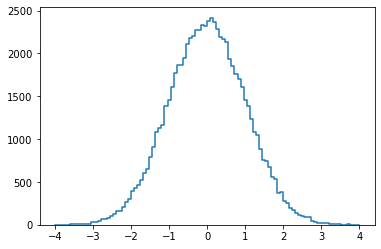

In [5]:
import matplotlib.pyplot as plt
import mplhep

mplhep.histplot(histograms["hpx"].bh)

/home/pivarski/miniconda3/lib/python3.7/site-packages/boost_histogram/_internal/hist.py:539: FutureWarning: Use .ndim instead
  warnings.warn(msg, FutureWarning)


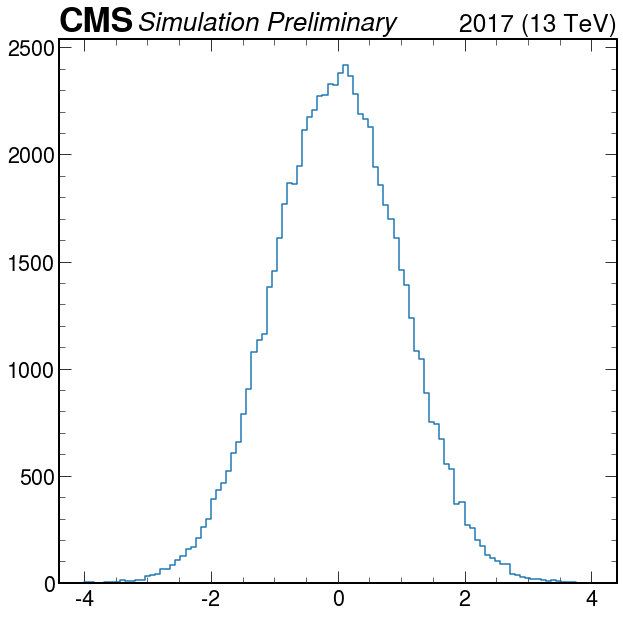

In [7]:
plt.style.use(mplhep.style.CMS)
mplhep.histplot(histograms["hpx"].bh)
mplhep.cms.label()

/home/pivarski/miniconda3/lib/python3.7/site-packages/boost_histogram/_internal/hist.py:539: FutureWarning: Use .ndim instead
  warnings.warn(msg, FutureWarning)


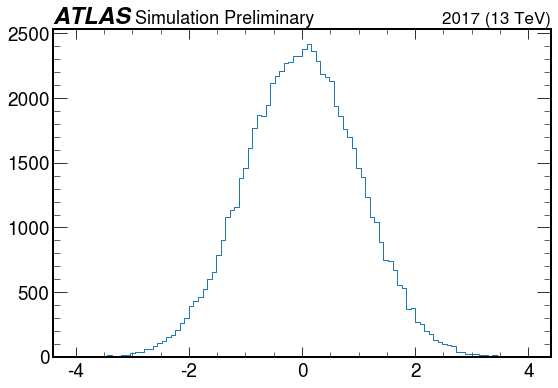

In [8]:
plt.style.use(mplhep.style.ATLAS)
mplhep.histplot(histograms["hpx"].bh)
mplhep.atlas.label()

In [9]:
mplhep.hist2dplot(histograms["hpxpy"].bh)

AttributeError: 'Histogram' object has no attribute 'T'

# Exploring a TTree

<img src="img/terminology.png" width="1000px">

It's generally useful to first look at a TTree with `show`.

In [ ]:
tree = root["Events"]
tree.show()

These are all the branches of the TTree with the type name of the branch (if Uproot can determine it) and its interpretation as an array (if possible).

TTrees also have a dict-like interface.

In [ ]:
tree.keys()

In [ ]:
tree.items()

In [ ]:
tree.typenames()

In [ ]:
isinstance(tree, Mapping)

In [ ]:
tree.keys(filter_name="Muon_*")

In [ ]:
tree.keys(filter_typename="float[]")

In [ ]:
tree.keys(filter_branch=lambda branch: not isinstance(branch.interpretation, uproot4.AsJagged))

# Turning branches into arrays

If a branch has a known interpretation, you can call `array` on it to get an array.

In [ ]:
tree["Muon_pt"].array()

First thing to notice: this is not a NumPy array. It's because the data have different numbers of values in each element (a jagged array).

In [ ]:
tree["Muon_pt"].array()[:20].tolist()

We can (in Uproot 4) _force_ it to be a NumPy array, but it isn't pretty:

In [ ]:
tree["Muon_pt"].array(library="np")[:20]

The data type (`dtype`) of this NumPy array is `object`, meaning that each element it contains is a Python object, namely another NumPy array.

The default is for all arrays to be Awkward arrays, but you can override this by specifying `library`.

The difference is that Awkward arrays interpret nested lists as a second dimension, whereas NumPy object arrays do not:

In [ ]:
awkward_array = tree["Muon_pt"].array(library="ak")
numpy_array = tree["Muon_pt"].array(library="np")

In [ ]:
# from the first 20 events, get the first item
awkward_array[:20, 0]

In [ ]:
# doesn't work with NumPy object arrays because contents are not guaranteed to be arrays
numpy_array[:20, 0]

Another valid library is Pandas. Pandas has its own way of describing variable length structures (`MultiIndex`).

In [ ]:
tree["Muon_pt"].array(library="pd")

In the original one-liner, we used colon (`:`) to separate a file path/URL from an object path to get to the branch:

In [ ]:
uproot4.open("data/opendata_muons.root:Events/nMuon")

And "cast" the branch as a NumPy array, which is the same as calling `array` with `library="np"`.

In [ ]:
np.array(uproot4.open("data/opendata_muons.root:Events/nMuon"))

This can be useful if you're passing the branch to a library that expects an array. _(Warning: only do this with non-jagged arrays!)_

In [ ]:
import matplotlib.pyplot as plt

plt.hist(uproot4.open("data/opendata_muons.root:Events/nMuon"), bins=11, range=(-0.5, 10.5));

# Pluralization

If you look carefully, you'll notice that there's an `array` function and an `arrays` function. The latter gets multiple arrays.

In [ ]:
# NumPy arrays in a dict
pv_numpy = tree.arrays(filter_name="PV_*", library="np")
pv_numpy

In [ ]:
# Awkward record-array
pv_awkward = tree.arrays(filter_name="PV_*", library="ak")
pv_awkward

In [ ]:
# Pandas DataFrame (as opposed to Series for a single array)
pv_pandas = tree.arrays(filter_name="PV_*", library="pd")
pv_pandas

All of these are "packages" of arrays that you might use in your analysis.

In [ ]:
pv_numpy["PV_x"]

In [ ]:
pv_awkward["PV_x"]

In [ ]:
pv_awkward.PV_x

In [ ]:
pv_pandas["PV_x"]

In [ ]:
pv_pandas.PV_x

Above, we used `filter_name` to select branches that match a pattern. We can also request specific branches:

In [ ]:
tree.arrays(["PV_x", "PV_y", "PV_z"])

Or do calculations. (This feature exists for TTree aliases, which can be formulas.)

In [ ]:
tree.arrays("PV", aliases={"PV": "sqrt(PV_x**2 + PV_y**2 + PV_z**2)"})

In [ ]:
tree.arrays("PV", cut="sqrt(PV_x**2 + PV_y**2) < 0.1", aliases={"PV": "sqrt(PV_x**2 + PV_y**2 + PV_z**2)"})

# Multiple files

Typically, you'll have a lot of files with similar contents.

## Concatenation

The simplest way to deal with this is to read a selection of branches entirely into memory, concatenating them.

If you have enough memory, go for it!

In [ ]:
all_in_memory = uproot4.concatenate("data/uproot-sample-*.root:sample", ["i4", "ai8", "Af8", "str"])
all_in_memory

In [ ]:
all_in_memory.i4

In [ ]:
all_in_memory.ai8

In [ ]:
all_in_memory.Af8

In [ ]:
all_in_memory.str

But, often enough, you don't have enough memory. What then?

## Laziness

One option is to open them as lazy arrays, which opens the files (to get the number of events in each), but doesn't read the data until you use it.

In [ ]:
not_in_memory_yet = uproot4.lazy("data/uproot-sample-*.root:sample")
not_in_memory_yet

"If it's not in memory, how can I see the values?"

Only the parts of the files (branches and batches of events) that are visible are read. In the above, `n` and `b` from the first file and `str` from the last file must have been read.

Let's get the `Af8` field:

In [ ]:
not_in_memory_yet.Af8

Again, this only read from the first and last files to show the first and last values.

A mathematical operation would cause them all to be read in.

In [ ]:
not_in_memory_yet.Af8 + 100

## Controlling the lazy cache

After (part of) a lazy array has been read, how long does it stay in memory? Is it constantly being re-read every time we do a calculation?

By default, a 100 MB cache is associated with the lazy array, but we can provide our own if we want a bigger or smaller one.

In [ ]:
cache = uproot4.LRUArrayCache("1 GB")

not_in_memory_yet = uproot4.lazy("data/uproot-sample-*.root:sample", array_cache=cache)

In [ ]:
cache

In [ ]:
not_in_memory_yet

In [ ]:
cache

In [ ]:
not_in_memory_yet + 100

In [ ]:
cache

What's more, we can clear it when we need to.

In [ ]:
cache.clear()

In [ ]:
cache

## Iteration

But often, that's still not enough control.

We don't read arrays into memory for the fun of it, we do it to perform calculations, and lazy arrays don't control which parts of which arrays are in memory during a calculation.

If you're worried about memory, the safest thing to do is to iterate over the data.

In [ ]:
for arrays in uproot4.iterate("data/uproot-sample-*.root:sample", ["i4", "Af8"]):
    print(arrays["i4"] + arrays["Af8"])

This iteration is _not_ one event at a time. (This set of TTrees has 420 entries.) It's a _chunk of events_ at a time.

In each step, a chunk of events for all specified arrays (`["i4", "Af8"]`) is read. You do your calculation, move on to the next step, and all the previous arrays are dropped. (Only TBasket data carries over if event steps don't line up with TBasket boundaries—a low-level detail.)

# Weird objects

Although Uproot is primarily for TTrees with simple types, it is possible to read some complex types.

In [ ]:
weird = uproot4.open("data/uproot-stl_containers.root:tree")

In [ ]:
weird.show()

In [ ]:
np.array(weird["map_string_vector_string"])

In [ ]:
HZZ = uproot4.open("data/uproot-HZZ-objects.root:events")

In [ ]:
HZZ.show()

In [ ]:
HZZ["muonp4"].array(library="pd")

Many errors that people report as "Uproot can't read type X" don't have anything to do with type X. To help zero in on actual deserialization errors, a lot more diagnostic information has been included.

In Uproot 4, this is what a deserialization error looks like (in THashList, encountered last Thursday):

```
    TH1F version 2 as <dynamic>.Model_TH1F_v2 (939 bytes)
        TH1 version 7 as <dynamic>.Model_TH1_v7 (893 bytes)
            (base): <TNamed 'cutflow' title='dijethad' at 0x7fafb4505f90>
            (base): <TAttLine (version 2) at 0x7fafb4506350>
            (base): <TAttFill (version 2) at 0x7fafb4506390>
            (base): <TAttMarker (version 2) at 0x7fafb4506310>
            fNcells: 9
            TAxis version 9 as <dynamic>.Model_TAxis_v9 (417 bytes)
                (base): <TNamed 'xaxis' at 0x7fafb4506890>
                (base): <TAttAxis (version 4) at 0x7fafb4506950>
                fNbins: 7
                fXmin: 0.0
                fXmax: 7.0
                fXbins: <TArrayD [] at 0x7fafb4506910>
                fFirst: 0
                fLast: 0
                fBits2: 4
                fTimeDisplay: False
                fTimeFormat: <TString '' at 0x7fafb44dc1d0>
                THashList version 5 as <dynamic>.Model_THashList_v0 (294 bytes)
                    TList version 1 as uproot4.models.TList.Model_TList (? bytes)
                        (base): <TObject None None at 0x7fafb4506fd0>
                        fName: ''
                        fSize: 475136

attempting to get bytes 1851028560:1851028561
outside expected range 0:939 for this Chunk
in file /home/pivarski/miniconda3/lib/python3.7/site-packages/skhep_testdata/data/uproot-issue33.root
in object /cutflow
```

# To split or not to split

"Splitting branches" is a technical detail in ROOT, but very important in Uproot, since Uproot views branches as arrays.

Here is an "unsplit" file:

In [ ]:
unsplit = uproot4.open("data/uproot-small-evnt-tree-nosplit.root:tree")

In [ ]:
unsplit.show()

And here is a "split" file:

In [ ]:
split = uproot4.open("data/uproot-small-evnt-tree-fullsplit.root:tree")

In [ ]:
split.show()

It's the same data, and they look the same in ROOT. But since a branch is a unit of what can be read into an array, we have to read whole objects or nothing.

In [ ]:
unsplit["evt"].array()

But with the split file, we can choose which parts to read.

In [ ]:
split.arrays(["P3.Px", "P3.Py", "P3.Pz"])

If there are any types in an unsplit object that Uproot can't deserialize, Uproot won't be able to read _any_ of its data.

If there are any types in a split object that Uproot can't deserialize, Uproot will be able to read everything else.

Also, split objects are usually faster to read, even if you read everything.

**Split your data whenever possible!**

# Writing to ROOT files

Uproot 4 cannot write to ROOT files yet: see Uproot 3 documentation.

Some caveats, though:

   * Writing ROOT files with Uproot will always be minimal: histograms and only basic types in TTrees.
   * You won't be able to update an existing file, only make new files.
   * It won't be as fast as writing with ROOT.

The issues involved in _writing_ an established format are considerably different from _reading_. If anyone thinks they can do better, they're welcome to try!

# Awkward Arrays

Why do we need our own array library? It's a long story, but if you're interested, I presented it to non-physicists here:

<a href="https://youtu.be/WlnUF3LRBj4"><img src="img/my-video.png"></a>

Let's take another look at the muon data.

In [ ]:
tree = uproot4.open("data/opendata_muons.root:Events")
tree.show()

We've already seen that it's "awkward" to deal with the jagged arrays in NumPy. However, they look and feel like records if "zipped" into an Awkward array.

In [ ]:
events = tree.arrays(library="ak", how="zip")
events

The data type encapsulates the structure of the events.

In [ ]:
ak.type(events)

`1000000 *` means that there are a million events, `"Muon": var *` means that the contents of the `"Muon"` field are jagged: there's a variable number of them per event.

We could look at a few of these as Python lists and dicts.

In [ ]:
ak.to_list(events[:3])

But the data are not actually arranged as objects in memory; each field (`"pt"`, `"eta"`, `"phi"`, etc.) is in an array by itself.

This means that structure-changing things like pulling out the kinematics are not expensive computations. (That is, they do not scale with the size of the dataset.)

You can project out and remix them without penalty.

In [ ]:
events["Muon", ["pt", "eta", "phi"]]

In [ ]:
ak.type(events["Muon", ["pt", "eta", "phi"]])

In [ ]:
events["Muon", "pz"] = events["Muon", "pt"] * np.sinh(events["Muon", "eta"])

In [ ]:
ak.type(events.Muon)

In [ ]:
events.Muon.pz

Since nearly all of you are familiar with NumPy, slicing arrays with boolean arrays is probably familiar to you.

What's new is that the boolean arrays can now be jagged to slice jagged arrays (i.e. cut particles).

In [ ]:
events.Muon.pt > 20

In [ ]:
events.Muon[events.Muon.pt > 20]

To cut events, make the jagged array of booleans a one-dimensional array of booleans. You can do this with a reducer (such as [ak.sum](https://awkward-array.readthedocs.io/en/latest/_auto/ak.sum.html) or [ak.max](https://awkward-array.readthedocs.io/en/latest/_auto/ak.max.html), but most likely [ak.any](https://awkward-array.readthedocs.io/en/latest/_auto/ak.any.html) and [ak.all](https://awkward-array.readthedocs.io/en/latest/_auto/ak.all.html) for booleans).

In [ ]:
ak.any(events.Muon.pt > 20, axis=1)

In [ ]:
events.Muon[ak.any(events.Muon.pt > 20, axis=1)]

# Awkward analysis

Several new operations are needed when arrays can have arbitrary data structures, so the Awkward Array library is best seen as a collection of functions acting on [ak.Array](https://awkward-array.readthedocs.io/en/latest/_auto/ak.Array.html) (the array type).

Probably the most important of these is [ak.num](https://awkward-array.readthedocs.io/en/latest/_auto/ak.num.html), which tells us the number of elements in each nested list.

In [ ]:
ak.num(events.Muon)

That's how many muons there are in each event.

This becomes necessary if we ever try to select the first (and second, etc.) element in each event. Some events might not have any.

In [ ]:
events.Muon[:, 0]

So we use [ak.num](https://awkward-array.readthedocs.io/en/latest/_auto/ak.num.html) to slice the first dimension.

In [ ]:
events.Muon[ak.num(events.Muon) > 0, 0]

## Masking vs cutting

In the nearly two years that physicists have been doing analyses with Awkward Arrays, they've found that cuts are difficult to accumulate. If the first cut changes the length of the array from 1000000 to 969031, boolean arrays that could be applied to the first array can't be applied to the second array.

In practice, they've taken a logical-and of all cuts and apply them at the end, but we can do better: we can mask, rather than cut.

In [ ]:
events.Muon.mask[events.Muon.pt > 20]

One of the new types that Awkward Array introduces is the "option type," which allows some values to be `None`. (It's a `?` in the type specification.)

## Making regular arrays

If you're feeding your data into a machine learning pipeline, you might need the jaggedness to go away. There are functions for padding jagged arrays (with `None`) so that they reach a desired length (and replacing `None` with a preferred value): [ak.pad_none](https://awkward-array.readthedocs.io/en/latest/_auto/ak.pad_none.html) (and [ak.fill_none](https://awkward-array.readthedocs.io/en/latest/_auto/ak.fill_none.html)).

In [ ]:
ak.pad_none(events.Muon.pt, 3, clip=True)

In [ ]:
ak.fill_none(ak.pad_none(events.Muon.pt, 3, clip=True), 0)

When you're plotting something, you usually want to flatten the jaggedness.

In [ ]:
plt.hist(ak.flatten(events.Muon.pt), bins=120, range=(0, 60));

## Awkward combinatorics

We often want to find pairs of particles with some invariant mass. To do that, we need combinatoric functions like [ak.cartesian](https://awkward-array.readthedocs.io/en/latest/_auto/ak.cartesian.html) and [ak.combinations](https://awkward-array.readthedocs.io/en/latest/_auto/ak.combinations.html).

<table style="margin-left: 0px">
    <tr style="background: white"><td style="font-size: 1.75em; font-weight: bold; text-align: center">Cartesian product (per event)</td><td style="font-size: 1.75em; font-weight: bold; text-align: center">n-choose-k combinations (per event)</td></tr>
    <tr style="background: white"><td><img src="img/cartoon-cartesian.png"></td><td><img src="img/cartoon-combinations.png"></td></tr>
</table>

In [ ]:
muon_pairs = ak.combinations(events.Muon, 2)
muon_pairs

In [ ]:
m1, m2 = ak.unzip(muon_pairs)
m1, m2

In [ ]:
masses = np.sqrt(2*m1.pt*m2.pt*(np.cosh(m1.eta - m2.eta) - np.cos(m1.phi - m2.phi)))
masses

In [ ]:
plt.hist(ak.flatten(masses), bins=80, range=(70, 110));

In [ ]:
plt.hist(ak.flatten(masses), bins=240, range=(0, 12))
plt.yscale("log")

# Numba

The most important Python library that most of you aren't aware of is Numba:

<a href="https://numba.pydata.org/"><img src="img/numba.png"></a>

The NumPy-like expressions for combinatorics look weird. It's fine for simple things when you get the hang of it, but really complex or performance-critical array expressions can be hard to write.

Numba lets you write Python for loops, but then it compiles them as though they were C functions.

Only a subset of Python and NumPy are accepted by its compiler, but Awkward Arrays are included.

In [ ]:
import numba as nb

In [ ]:
@nb.jit
def find_energetic_muon(events):
    for event in events:
        for muon in event.Muon:
            if muon.pt > 100000:
                return muon
    return None

In [ ]:
find_energetic_muon(events).tolist()

Or better yet,

In [ ]:
@nb.jit
def find_energetic_muons_event(events):
    for i in range(len(events)):
        for muon in events[i].Muon:
            if muon.pt > 100000:
                return i
    return -1

In [ ]:
find_energetic_muons_event(events)

In [ ]:
events[7400].tolist()

The invariant mass calculation looks more conventional this way, though it is more verbose, too. You also need two passes to allocate an array of the right size.

In [ ]:
@nb.jit
def invariant_mass(events):
    num_pairs = 0
    for event in events:
        num_pairs += max(0, len(event.Muon) * (len(event.Muon) - 1) // 2)
    out = np.empty(num_pairs, np.float64)
    
    num_pairs = 0
    for event in events:
        for i in range(len(event.Muon)):
            for j in range(i + 1, len(event.Muon)):
                m1 = event.Muon[i]
                m2 = event.Muon[j]
                out[num_pairs] = np.sqrt(2*m1.pt*m2.pt*(np.cosh(m1.eta - m2.eta) - np.cos(m1.phi - m2.phi)))
                num_pairs += 1
    
    return out

In [ ]:
masses = invariant_mass(events)

In [ ]:
plt.hist(masses, bins=80, range=(70, 110));

In [ ]:
plt.hist(masses, bins=240, range=(0, 12))
plt.yscale("log")

The important point is that _you don't have to choose_ between Awkward combinatorics and Numba. You can pass the same data structures through `ak.this` and `ak.that` functions as you can pass into Numba-compiled functions.

   * Awkward's array-at-a-time functions are best for interactive exploration. It can be hard to express deeply nested loops with [ak.cartesian](https://awkward-array.readthedocs.io/en/latest/_auto/ak.cartesian.html) and [ak.combinations](https://awkward-array.readthedocs.io/en/latest/_auto/ak.combinations.html).
   * Numba's just-in-time compilation is best for tricky algorithms and high performance. It can be hard to satisfy Numba's type constraints and stay within the supported [Python subset](https://numba.pydata.org/numba-doc/dev/reference/pysupported.html) and [NumPy subset](https://numba.pydata.org/numba-doc/dev/reference/numpysupported.html).

Use them both in your data analysis! Use Numba to make indexes to slice Awkward arrays; use Awkward to prepare structures for Numba.

(I haven't even mentioned the fact that Awkward Arrays are [accessible from C++](https://github.com/scikit-hep/awkward-1.0/tree/master/dependent-project) and will [soon run on GPUs](https://github.com/scikit-hep/awkward-1.0/projects/1).)